Q1. Simulate a single path of a one-dimensional Wiener process (standard Brownian
motion) over the interval [0, T]. Your output should be the full simulated path.

Discretize ([0, T]) into (N) steps of size (\Delta t = T/N).


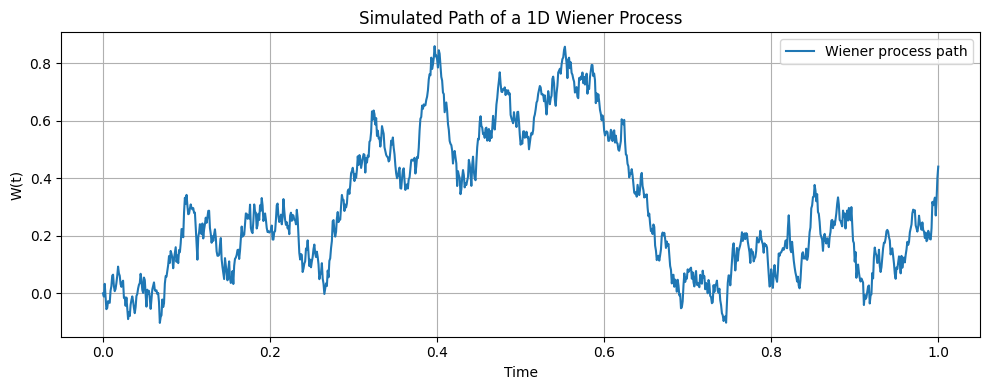

In [8]:
import numpy as np
import matplotlib.pyplot as plt

T = 1.0
N = 1000
dt = T / N
t = np.linspace(0, T, N+1)

#wiener process
W = np.zeros(N+1)
W[1:] = np.cumsum(np.sqrt(dt) * np.random.randn(N))


plt.figure(figsize=(10, 4))
plt.plot(t, W, label='Wiener process path')
plt.title('Simulated Path of a 1D Wiener Process')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



Q2. Let α and σ > 0 be constants, and define the geometric Brownian motion

S(t) = S(0) exp

σW(t) +
α −
1
2
σ
2

t

.

Simulate 5 paths in a single plot for the above Geometric Brownian Motion.

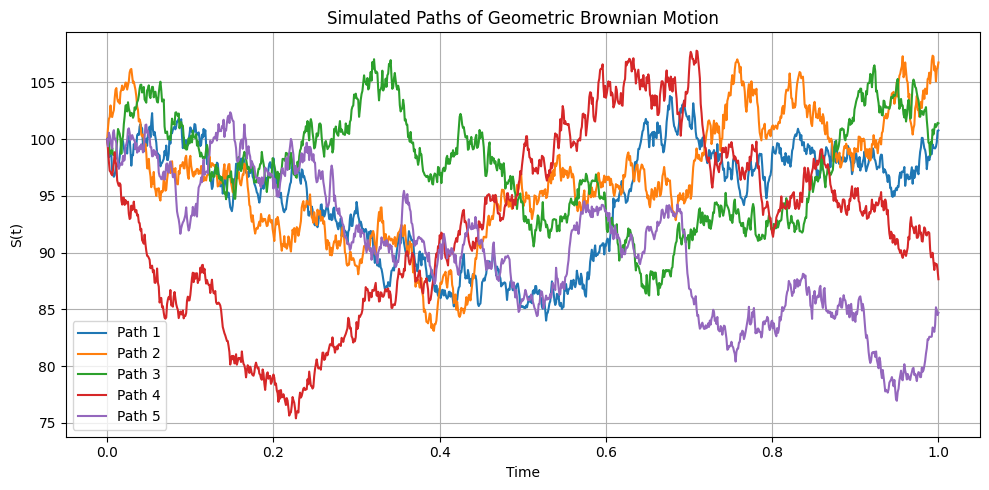

In [9]:
# Parameters
S0 = 100
alpha = 0.05
sigma = 0.2
num_paths = 5  # Number of simulated paths

# Simulating Brownian motions
dW = np.sqrt(dt) * np.random.randn(num_paths, N)
W = np.cumsum(dW, axis=1)
W = np.hstack([np.zeros((num_paths, 1)), W])

# Simulating Geometric Brownian Motion paths
drift = (alpha - 0.5 * sigma**2) * t
S = S0 * np.exp(sigma * W + drift)

#Plot
plt.figure(figsize=(10, 5))
for i in range(num_paths):
    plt.plot(t, S[i], label=f'Path {i+1}')
plt.title('Simulated Paths of Geometric Brownian Motion')
plt.xlabel('Time')
plt.ylabel('S(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Q3. Show that for standard Brownian motion, E[WsWt

] = min(s, t) for s, t ≥ 0.

We will use this brownian motion property: W
t
​
 =W
s
​
 +(W
t
​
 −W
s
​
 )

In [10]:


# Parameters
M = 10000
time = np.linspace(0, T, N + 1)

# Choose s and t such that s < t
s_index = int(0.3 * N)
t_index = int(0.7 * N)
s = time[s_index]
t = time[t_index]

# Simulating M Brownian motion paths
dW = np.sqrt(dt) * np.random.randn(M, N)
W = np.zeros((M, N + 1))
W[:, 1:] = np.cumsum(dW, axis=1)

# Estimating E[W_s * W_t]
W_s = W[:, s_index]
W_t = W[:, t_index]
expected_WsWt = np.mean(W_s * W_t)
min_st = min(s, t)

expected_WsWt, min_st


(np.float64(0.30308846977674275), np.float64(0.3))

Q4. Let 0 ≤ s < t. Show that Wt −Ws is normally distributed with mean 0 and variance
t − s, and that increments over non-overlapping intervals are independent.

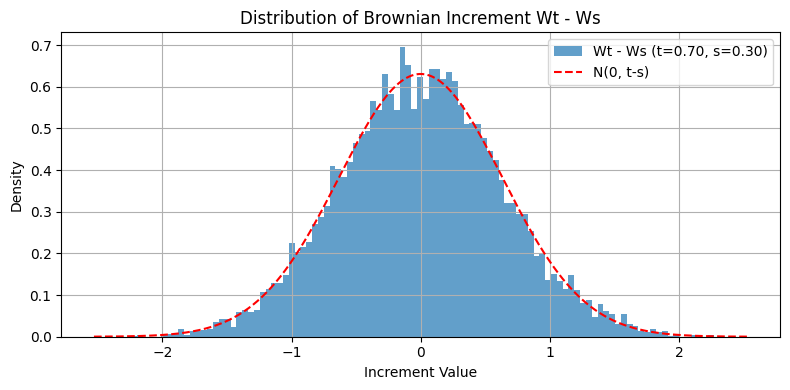

np.float64(0.004899737930195756)

In [13]:
M = 10000
T = 1.0
N = 1000
dt = T / N
t = np.linspace(0, T, N + 1)


# Simulating brownian motion paths
dW = np.sqrt(dt) * np.random.randn(M, N)
W = np.cumsum(dW, axis=1)
W = np.hstack([np.zeros((M, 1)), W])  # Include W(0) = 0

# Choose s < t
s_index = int(0.3 * N)
t_index = int(0.7 * N)
s = t[s_index]
t_val = t[t_index]

# Compute increments
increments = W[:, t_index] - W[:, s_index]

# Plotting histogram of increments
plt.figure(figsize=(8, 4))
plt.hist(increments, bins=100, density=True, alpha=0.7, label=f'Wt - Ws (t={t_val:.2f}, s={s:.2f})')
mu = 0
sigma = np.sqrt(t_val - s)
x_vals = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x_vals / sigma)**2)
plt.plot(x_vals, pdf, 'r--', label='N(0, t-s)')
plt.title('Distribution of Brownian Increment Wt - Ws')
plt.xlabel('Increment Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Check independence: Corr(W_s, W_t - W_s) should be ~0
W_s = W[:, s_index]
W_t_minus_W_s = increments
correlation = np.corrcoef(W_s, W_t_minus_W_s)[0, 1]
correlation


Q5. Show that for any t ≥ 0, E[Wt|Fs] = Ws for 0 ≤ s ≤ t. Conclude that Brownian

motion is a martingale.

We have to show this to prove that it is a martingale. We will be verifying this numerically : E[W
t
​
 ∣F
s
​
 ]=E[W
s
​
 +(W
t
​
 −W
s
​
 )∣F
s
​
 ]=W
s
​
 +E[W
t
​
 −W
s
​
 ]=W
s
​


In [12]:


# Brownian motion simulation
def simulate_brownian_motion(T, N, num_paths):
    dt = T / N
    t = np.linspace(0, T, N + 1)
    W = np.zeros((num_paths, N + 1))

    for i in range(1, N + 1):
        dW = np.sqrt(dt) * np.random.randn(num_paths)
        W[:, i] = W[:, i - 1] + dW
    return t, W



t, W = simulate_brownian_motion(T, N, M)

# Pick s and t such that 0 <= s <= t
s_idx = int(0.4 * N)
t_idx = int(0.8 * N)

# Conditional expectation approximation
Wt_given_Fs = np.mean(W[:, t_idx] - W[:, s_idx])  # E[W_t - W_s] ≈ 0
approx_E_Wt_given_Fs = W[:, s_idx] + Wt_given_Fs

# Check if E[W_t | F_s] ≈ W_s
error = np.mean(np.abs(approx_E_Wt_given_Fs - W[:, s_idx]))
print(f"Average absolute error in martingale property: {error:.5f}")


Average absolute error in martingale property: 0.00268
